In [1]:
# 1. Install Dependencies and Setup
%pip install tensorflow tensorflow-gpu opencv-python matplotlib
%pip list

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\ADEBOSS\AppData\Local\Temp\pip-install-tpn5qpw4\tensorflow-gpu_594650e2c5454706b695e27cf471944a\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not bu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
Package                      Version
---------------------------- -----------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
autopep8                     2.0.0
backcall                     0.2.0
beautifulsoup4               4.11.1
blinker                      1.6.2
bs4                          0.0.1
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.0.1
click                        8.1.3
colorama                     0.4.6
comm                         0.1.3
confusion-matrix             0.1
contourpy                    1.0.7
cycler                       0.11.0
dabl                         0.2.5
debugpy                      1.6.7
decorator             

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')


[]

In [4]:
# 2. Remove dodgy images
import cv2
import imghdr
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png', 'svg']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

C:\Users\ADEBOSS\AppData\Local\Temp\ipykernel_12552\2765553025.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Image not in ext list data\basal cell carcinoma\192px.svg
Image not in ext list data\basal cell carcinoma\383px-Basal_Cell_Carcinoma_Left_Upper_Back_nodular_and_micronodular.jpg
Image not in ext list data\basal cell carcinoma\Basal-Cell-Carcinoma-Recurrence-After-Mohs-All-Your-Questions-Answered.webp
Image not in ext list data\basal cell carcinoma\basalCellCarcinomaBCC_6163_lg.jpg
Image not in ext list data\basal cell carcinoma\Basalcellcarcinomanakedeye.jpg
Image not in ext list data\basal cell carcinoma\nodular.webp
Image not in ext list data\basal cell carcinoma\vector.svg
Image not in ext list data\basal cell carcinoma\vector10.svg
Image not in ext list data\basal cell carcinoma\vector2.svg
Image not in ext list data\basal cell carcinoma\vector3.svg
Image not in ext list data\basal cell carcinoma\vector4.svg
Image not in ext list data\basal cell carcinoma\vector5.svg
Image not in ext list data\basal cell carcinoma\vector6.svg
Image not in ext list data\basal cell carcinoma\vector7.

Found 471 files belonging to 3 classes.


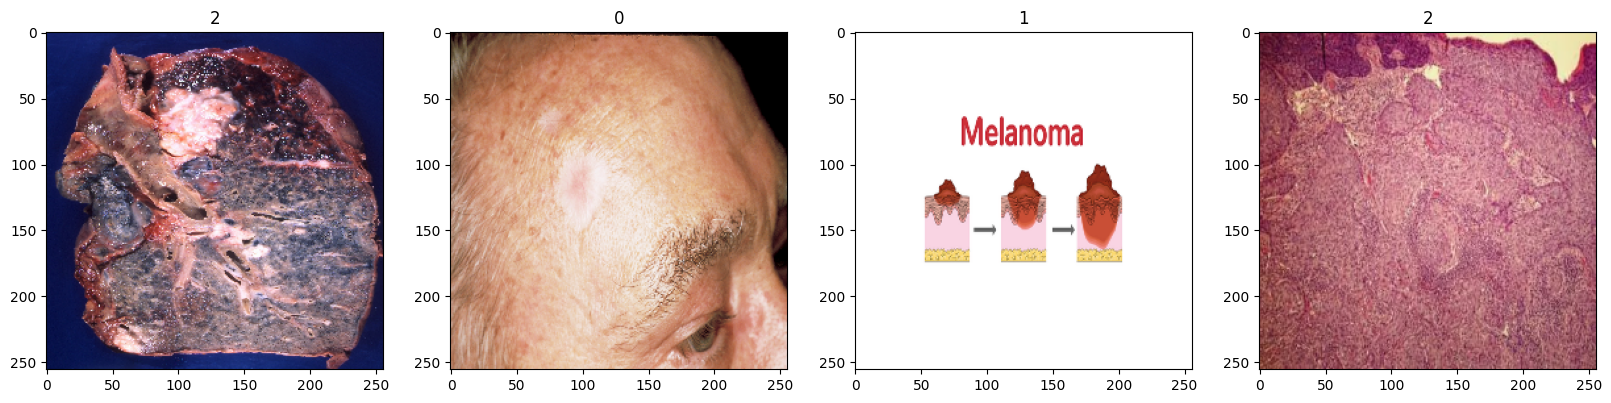

In [5]:
# 3. Load Data
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('data', labels='inferred', label_mode='int')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

In [6]:
# 4. Scale Data
data = data.map(lambda x, y: (x / 255, y))
data.as_numpy_iterator().next()


(array([[[[0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          ...,
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746]],
 
         [[0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          ...,
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746]],
 
         [[0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          ...,
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746],
          [0.        , 0.16078432, 0.16862746]],
 
         ...,
 
         [[0.        , 0.16078432, 0.16862746],
          [0.     

In [7]:
# 5. Split Data
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)
train_size, val_size, test_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


In [8]:
# 6. Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [9]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 4 output classes
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [10]:
# 7. Train
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/30
10/10 [==============================] - 70s 6s/step - loss: 1.2315 - accuracy: 0.3156 - val_loss: 1.1258 - val_accuracy: 0.2083
Epoch 2/30
10/10 [==============================] - 42s 4s/step - loss: 1.1039 - accuracy: 0.3688 - val_loss: 1.0895 - val_accuracy: 0.4062
Epoch 3/30
10/10 [==============================] - 39s 4s/step - loss: 1.0890 - accuracy: 0.4031 - val_loss: 1.0755 - val_accuracy: 0.5417
Epoch 4/30
10/10 [==============================] - 40s 4s/step - loss: 1.0630 - accuracy: 0.5531 - val_loss: 1.0735 - val_accuracy: 0.3854
Epoch 5/30
10/10 [==============================] - 41s 4s/step - loss: 1.0237 - accuracy: 0.4812 - val_loss: 0.9694 - val_accuracy: 0.6458
Epoch 6/30
10/10 [==============================] - 39s 4s/step - loss: 0.9437 - accuracy: 0.5406 - val_loss: 0.8740 - val_accuracy: 0.5938
Epoch 7/30
10/10 [==============================] - 37s 3s/step - loss: 0.8667 - accuracy: 0.6438 - val_loss: 0.7718 - val_accuracy: 0.6562
Epoch 8/30
10/10 [==

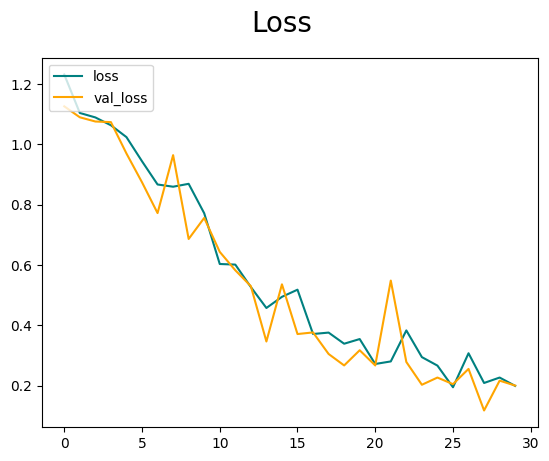

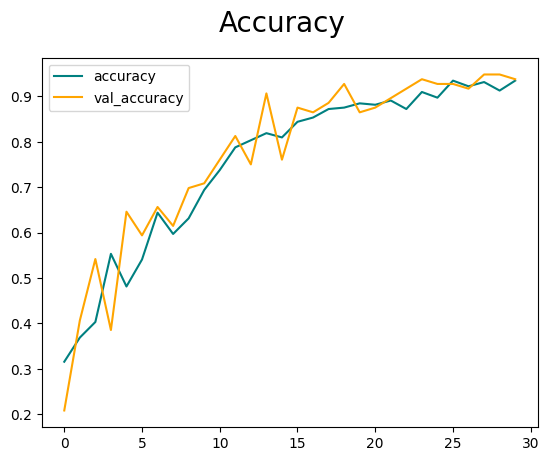

In [11]:
# 8. Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [12]:
# 9. Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat_classes = np.argmax(yhat, axis=-1)  # Get the predicted class indices
    
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)
print(pre.result(), re.result(), acc.result())


1/1 [==============================] - 1s 813ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9130435, shape=(), dtype=float32) tf.Tensor(0.59375, shape=(), dtype=float32)


In [13]:
# 10. Test
import cv2

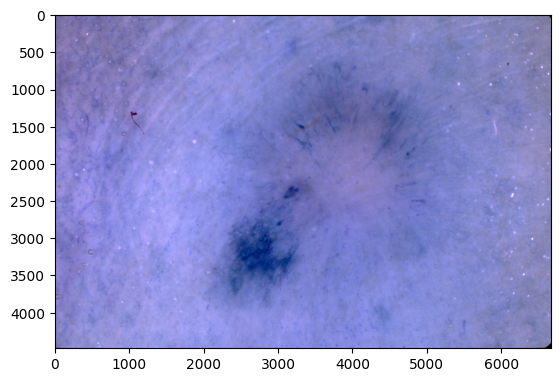

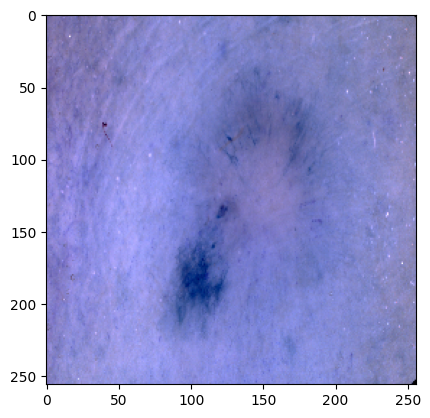

1/1 [==============================] - 0s 168ms/step
Predicted class is a Melanoma


In [14]:
img = cv2.imread('SKCD/basal cell carcinoma/')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize / 255, 0))
predicted_class = np.argmax(yhat)  # Get the index of the highest probability class
classes = ['Basal cell Carcinoma', 'Dermatofibroma', 'Melanoma', 'Squamous cell carcinoma']
print(f'Predicted class is a {classes[predicted_class]}')

In [15]:
# 11. Save the Model
from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'imageclassifier.h5'))
new_model = load_model('models/imageclassifier.h5')
new_model.predict(np.expand_dims(resize / 255, 0))


1/1 [==============================] - 0s 161ms/step


array([[0.30441377, 0.21711464, 0.4784716 ]], dtype=float32)